In [49]:
# Dinh tinh: count ~ normal
# Dinh luong: min , max , std , sum , count (ko thuong)
# Cong thuc 1, 2 , 3 , 4 , 5 : p_value > alpha --> accpect
#              6, 7          : p_value >alpha --> reject
# Vi du: dinh tinh 
# - Giới tính (Nam, Nữ)
# - Màu sắc (Xanh, Đỏ, Vàng)
# - Mức độ hài lòng (Kém, Trung bình, Tốt)
#H0: Giả thiết suy diễn
# alpha: mức sai lần: 10% 5% 1%
# độ tin cậy: 90% 95% 99%

In [50]:



import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')
df 

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [51]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [52]:
# Kiem tra truoc khi su dung 
df['KT'].value_counts()

A     49
D1    22
C     14
B      9
A1     6
Name: KT, dtype: int64

In [53]:
# Cau 1: su dung du lieu mau
# Hay suy dien xem trung binh thi M1
# cua toan bo thi sinh thi khoi C bang 4.0 
#  Gia thuyet H_0: tb(M1)/c = 4.0 ko, xem diem trung binh no co phai 4.0 khong
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

1     6.00
2     5.00
6     6.50
22    5.00
23    6.75
24    7.00
25    4.75
26    5.25
27    5.25
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, dtype: float64

In [54]:
dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

#### 1. One sample T-test (n_sample < 30): Dinh luong
 - Gia dinh: H0: y =x
 - p_value >= alpha --> accpect
 - p_value < alpha --> reject
 #
 - Dấu hiệu dùng: 
 - One-sample T-test được dùng khi bạn muốn so sánh trung bình của một mẫu với một giá trị trung bình đã biết hoặc được giả định. 
- Ví dụ: bạn muốn kiểm tra xem chiều cao trung bình của một nhóm học sinh có khác biệt đáng kể so với 165 cm không.
- Giả định: H0: tbinh nhóm học sinh cao bằng 165cm

In [55]:
# Syntax:
# Vi du diem thi M2 cua khoi C co bang 5.0 khong
# import scipy.stats as stats
# stats.ttest_1samp(dfKhoiC['M2'], popmean=5.0)
# Nếu t càng lớn hoặc nhỏ hơn 0 thì mức độ khác biệt giữa trung bình mẫu và giá trị giả định càng lớn.

# Sau khi tính ra giá trị t, bạn sẽ tra cứu bảng phân phối T hoặc tính giá trị p-value để xác định xem 
# sự khác biệt này có ý nghĩa thống kê hay không.

In [56]:
dfKhoiC['M1'].shape

(14,)

In [57]:
import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)
# Do anpha = 0.05 va p value = 3.63398 
# Ko du du kien de noi rang trung binh mon M1 la 4.0
# Hay noi cach khac ko chap nhan H0 o muc sai lam 5% (neu khong noi la mac dinh 5%)
# p_value < alpha ==> reject: diem thi tb cua khoi C khong bang 4.0
# ==> khong du dieu kien de noi rang tb diem thi cua thi sinh khoi C la 4.0 voi muc sai lam 5%

TtestResult(statistic=7.650519779016341, pvalue=3.6339826927369557e-06, df=13)

In [58]:
# SInh vien ktra xem diem trung binh mon M2 cua khoi c co 5.0 hay khong
dfKhoiC = df.loc[df['KT'] == 'C']
# .loc[] sẽ dùng kết quả của biểu thức điều kiện (df['KT'] == 'C') để lọc các hàng trong DataFrame.
# Ở đây, df['KT'] == 'C' trả về một mảng boolean, và .loc[] sẽ chỉ giữ lại các hàng mà điều kiện là True.
dfKhoiC


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
6,SV007,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
22,SV0023,F,NaN,2,5.00,3.50,6.00,C,6/13/2019,No
23,SV0024,M,NaN,2NT,6.75,5.25,5.00,C,6/13/2019,No
24,SV0025,F,NaN,1,7.00,2.25,5.25,C,6/13/2019,Yes
25,SV0026,F,NaN,1,4.75,2.00,5.50,C,6/13/2019,No
26,SV0027,F,NaN,1,5.25,4.50,4.75,C,6/13/2019,No
27,SV0028,F,NaN,2NT,5.25,5.00,3.50,C,6/13/2019,Yes
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes


In [59]:
dfKhoiC['M2'].describe()


count    14.000000
mean      4.232143
std       1.947544
min       1.500000
25%       2.750000
50%       3.875000
75%       5.187500
max       8.000000
Name: M2, dtype: float64

In [60]:
dfKhoiC['M2'].shape

(14,)

<p> count: Số lượng phần tử (số lượng giá trị không bị thiếu trong cột).
<p> mean: Giá trị trung bình của các giá trị trong cột.
<p> std: Độ lệch chuẩn (mức độ phân tán của các giá trị).
<p> min: Giá trị nhỏ nhất trong cột.
<p> 25%: Phân vị thứ 25 (còn gọi là Q1, giá trị tại 25% số lượng giá trị).
<p> 50%: Phân vị thứ 50 (còn gọi là trung vị hoặc median, giá trị giữa của dãy số).
<p> 75%: Phân vị thứ 75 (Q3, giá trị tại 75% số lượng giá trị).
<p> max: Giá trị lớn nhất trong cột.
<p> Median (trung vị) là giá trị chính giữa trong một tập hợp các số khi chúng được sắp xếp theo thứ tự từ nhỏ đến lớn.

In [61]:
# Cau 2: su dung du lieu mau
# Hay suy dien xem trung binh thi M2
# cua toan bo thi sinh thi khoi C bang 5.0 
#  Gia thuyet H_0: tb(M1)/c = 5.0 ko, xem diem trung binh no co phai 5.0 khong
import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M2'], popmean=5.0)
# Do p_value > alpha :  du dieu kien ket luan 
#Đủ dữ kiện để suy diễn điểm trung bình M2 cho thí sinh thi khối C là 5.0 với mức tin cậy 95%

TtestResult(statistic=-1.4752216305397354, pvalue=0.16395763655140863, df=13)

### 2. Two sample T Test (n_sample < 30): Dinh luong X, Y
- muc dich ktra tb cua 2 bien so dinh tinh co bang nhau khong
- H0: X = Y (x, y la trung binh) 
- p_value > alpha: --> accept
- p_value <= alpha: --> reject
- p_value: muc tin cay [10%, 5%]

In [62]:
dfKhoiC.shape

(14, 10)

In [63]:
# Cau 1: Ktra trung binh diem thi cua M1 co bang M2 hay khong?
# H0: M1/c = M2/c = 5% =0.05d
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)
# do p_value < alpha = 5% nen khong du dieu kien

Ttest_indResult(statistic=2.5331368604654054, pvalue=0.017676922552296807)

In [64]:
#Cau 2: Tb diem thi cua M1 co bang M3 thi sinh thi khoi C voi tin cay 95%

dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M3'], equal_var=True)
# equal_var = False Giả định rằng phương sai của hai nhóm không bằng nhau, để điều chỉnh phép kiểm định.

Ttest_indResult(statistic=2.6321295849540447, pvalue=0.014085909192033959)

In [65]:
df['KT'].value_counts()

A     49
D1    22
C     14
B      9
A1     6
Name: KT, dtype: int64

#### 3. One Sample Z-test (n_sample >= 30) lam nhu One sample T test
- Giả định: H0: u = u0 
- p_value >= alpha -->accpect
- p_value < alpha --> reject
#### Cong dung:
Dùng để kiểm định trung bình của biến định lượng có bằng một giá trị cho trước với điều kiện số lượng mẫu > 30

In [66]:
df['M1'].shape

(100,)

In [67]:
# Cau 1:  Ktra diem trung binh cua M1 co bang 8.0 hay khong ?
from statsmodels.stats.weightstats import ztest as ztest

ztest(df['M1'], value=8.0)

# Khong du du kien de noi rang trung binh cua M1 bang 8.0 ==> reject

(-29.907152266677993, 1.588509177330612e-196)

In [68]:
# Cau 2:  Ktra diem trung binh cua M2 co bang 6.7 hay khong ?
from statsmodels.stats.weightstats import ztest as ztest

ztest(df['M2'], value= 6.7)

# Khong du du kien de noi rang trung binh cua M2 bang 6.7 ==> reject

(-23.06488697108683, 1.0428701078797563e-117)

### 4. Two sample Z-test (n >= 30) 
- Gia dinh: H0: X = Y (x, y trung binh) = 2 thang bang nhau
- p_value > alpha --> accpect 
- p_value <= alpha --> reject

In [69]:
# Hay ktra diem Tbinh M1 co bang M2 hay khong
ztest(df['M1'], df['M2'], value=0)
# p value = 0.0037259661678783573 < alpha
# khong du du kien de noi M1 vang M2


(-2.9004757923795, 0.0037259661678783573)

In [70]:
# Hay ktra diem Tbinh M3 co bang M2 hay khong
ztest(df['M2'], df['M3'], value=0)
# p value =  3.009250404643791e-05 < alpha = 0.05 
# khong du dieu kien de noi
#Không đủ dữ kiện để chứng minh điểm trung bình M2 bằng M3 với mức tin cậy 95%

(-4.172765180703833, 3.009250404643791e-05)

In [71]:
'''
    one sample T Test: n < 30
    two sample T test : n < 30
    one sample Z test: n>= 30
    two sample Z test: n >= 30
'''

'\n    one sample T Test: n < 30\n    two sample T test : n < 30\n    one sample Z test: n>= 30\n    two sample Z test: n >= 30\n'

<h3 style="color: skyblue"> 5. Suy diễn tương quan: định lượng X , Y</h3>

- r_(x,y) < 0 ==> Tuong quan nghich , X tang Y giam va nguoc lai
-  r_(x,y) = 0 ==> ko tuong quan
-  r_(x,y) > 0 ==> tuong quan thuan , X tang Y tang, X giam Y giam
-  r_(x,y) thuoc [-1, 1] 
-  |r_(x,y)| 
-   Hinh:
- ----Yeu-------|------Trung binh -----|----Kha-----|-----Tot------|---------Hoan Hao------------ 
-                 0.5          0.65        0.8           0.95
- Gia thuyet : H0 = r_(x,y) = 0
 #
 #
  #### 1.Giả thuyết cần kiểm định:
- (H0): Không có tương quan (hệ số tương quan r = 0).
- (H1): Có  tương quan tuyến  (r ≠ 0).
#
#
  #### 2. Giải thích cụ thể:
- |r| > 0.7         : Tương quan mạnh.
- 0.3 < |r| < 0.7   : Tương quan trung bình.
- |r| < 0.3         : Tương quan yếu hoặc không có
#
#
  #### 3. P-value (giá trị p):
- Nếu p-value > 0.05: Không đủ bằng chứng để bác bỏ H0, không tương quan, accpect Hr --> ko xét r --> r= 0
- Nếu p-value ≤ 0.05: Có bằng chứng để bác bỏ H0, tương quan , reject H0 --> xét đến r

In [72]:
# Cau 1 : M1 va  M2 co tuong quan hay khong 
# H0: M1 M2 khong tuong quan
# p_value > alpha --> accpect --> r = 0
# 
from scipy.stats.stats import pearsonr

pearsonr(df['M1'], df['M2'])
# |r| = 0.035154057257850216, pvalue=0.7284198928723641 > alpha )
# Du du kien de suy dien M1 va M2 khong tuong quan voi muc tin 95%

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2080\2666140487.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.035154057257850216, pvalue=0.7284198928723641)

In [73]:
#Cau 2:  M1 va M3 co tuong quan khong
from scipy.stats.stats import pearsonr

pearsonr(df['M1'], df['M3'])
# M2 va M3 khong tuong quan khong
#Không đủ điều kiện để nói M1 và M2 là tương quan (Không tương quan)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2080\511577475.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.018730760164383124, pvalue=0.8532534347055029)

In [74]:
# Cau 3: M2 va M3 co tuong quan khong
from scipy.stats.stats import pearsonr

pearsonr(df['M2'], df['M3'])
#  Khong du du kien de suy dien M2 va M3 . Suy ra khong tuong quan

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2080\1022350455.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.09152288755408225, pvalue=0.36513447674961524)

In [75]:
from scipy.stats.stats import pearsonr

pearsonr(df['M3'], df['M2'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2080\3678351755.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.09152288755408225, pvalue=0.36513447674961524)

<h3 style="color:red"> 6. Suy diễn fisher: 2 biến định tính<h3>
 
    H0: 2 biến độc lập, không phụ thuộc 
    Dinh tinh dung moi: Count
#### 1. H0 (Giả thuyết không): 
- H0: độc lập -->  Không có mối quan hệ giữa hai biến, nghĩa là phân phối giữa các nhóm không khác biệt.
- H1 (Giả thuyết đối): phụ thuộc --> Có mối quan hệ giữa hai biến.
#### 2. Gia tri p_value:
- p_value > alpha --> accpect --> ko có mối quan hệ 
- p_value <= alpha -->reject --> có mối quan hệ
#### 3. Dữ liệu là biến định tính: 
- Cả hai biến phải là định tính, và thường được trình bày dưới dạng bảng tần số (bảng chéo).
####
- Kiểm tra sự độc lập của 2 biến ĐỊNH TÍNH mà ở đó giá trị thể hiện ở dạng nhị phân dạng nhị phân 2x2
- Chủ yếu các phương pháp kiểm tra định tính sẽ được suy diễn từ bảng cross tab
- Ho: 2 biến độc lập
- Count là hàm dùng cho biến định tính



In [76]:
import scipy.stats as stats

In [77]:
df['GT'].value_counts()

M    52
F    48
Name: GT, dtype: int64

In [78]:
df['NGHE'].value_counts()

No     55
Yes    45
Name: NGHE, dtype: int64

In [79]:
# Hãy kiểm tra xem có sự phụ thuộc nào giữa việc sinh viên có định hướng nghề nghiệp và giới tính khi thí sinh đăng ký dự thi không
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata
# Tong 4 lai bang 100
# F: co 25 ban duoc dinh huong nghe nghiep
# M: co 20 ban 
# Có 25 sinh viên nữ được định hướng nghề nghiệp
# Có 23 sinh viên nữ không được định hướng nghề nghiệp
# Có 32 sinh viên nam không được định hướng nghề nghiệp
# Có 20 sinh viên nam được định hướng nghề nghiệp


NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [80]:
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
# Dac trung fisher khong co su khac biet giua 2 bien dinh tinh 
# Do p_value : 0.227 > alpha = 0.05 =>> chap nhan H0: du dieu kien de noi rang Nghe doc lap voi Gioi Tinh
# pvalue: 0.22763927303454412 > 0.05
# Chấp nhận Ho: Đủ điều kiện để nói rằng việc hướng nghiệp là độc lập so với giới tính
# Chấp nhận Ho: Không đủ điều kiện để nói rằng giới tính phụ thuộc vào hướng nghiệp
# Việc khi tuyển sinh thì giới ảnh hưởng đến việc lựa chọn nghề nghiệp

odd ratio is : 0.575
p_value is : 0.22763927303454412


<h3 style="color:skyblue"> 7: Suy diễn Chi-quare: 2 biến định tính</h3>

        Gia dinh: H0: 2 biến độc lập, không phụ thuộc 
        Note: khong nhi phan thi lam duoc
#### 1. Giả thuyết kiểm định:
- H0 (Giả thuyết không): Hai biến độc lập với nhau, không có mối quan hệ giữa chúng.
- H1 (Giả thuyết đối): Hai biến có mối quan hệ với nhau.
#### 2. Giá trị p_value:  
- Nếu p-value > 0.05: Bạn không đủ bằng chứng để bác bỏ giả thuyết không và có thể kết luận rằng không có mối quan hệ rõ ràng giữa hai biến 
--> Độc lập
- Nếu p-value ≤ 0.05: Bạn có thể bác bỏ giả thuyết không và kết luận rằng hai biến có mối quan hệ thống kê.
--> Phụ thuộc
#### 3. Dữ  liệu	Bảng chéo có thể lớn hơn 2x2 (như 3x3, 4x2,...)

In [81]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata



KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


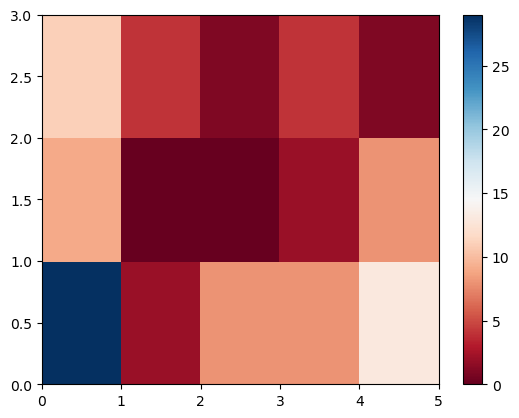

In [83]:
# Bieu do histmap 
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()


In [35]:
# Khoi thi doc lap voi khu vuc 
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
# Ket luan : do p value is 0.02012461887796485 < alpha = 0.05
# Nen ko du du kien de noi rang khoi thi doc lap voi khu vuc, Khu vu phu thuoc vao khoi thi

p value is 0.02012461887796485
Dependent (reject H0)


<h3 style="color:yellow"> 8. One Way ANOVA: định lượng và định tính</h3>
 
-  Dùng để kiểm tra trung bình định lượng trên từng nhóm định tính có bằng nhau hay không

-   Gia dinh: H0: X_(n1) =   X_(n2) =  X_(nm)
#### 1. Giả thuyết 
- H0: Trung bình của các nhóm là như nhau (không có sự khác biệt). H0: ko phụ thuộc  
- H1: Có ít nhất một nhóm có trung bình khác biệt so với các nhóm khác.
#### 2. Dấu hiệu:
- ANOVA một chiều (One-way ANOVA) áp dụng khi bạn muốn kiểm tra sự khác biệt giữa trung bình 
- của nhiều nhóm dựa trên một biến độc lập định tính và một biến phụ thuộc định lượng.
- p_value >0 -->accpect ,  ko phu thuoc 
- p_value <= 0 --> reject , phu thuoc 


<p style="color:yellow">M1: Đây là biến phụ thuộc (dependent variable), nghĩa là biến mà chúng ta muốn dự đoán hoặc giải thích.
<p style="color:yellow">GT: Đây là biến độc lập (independent variable), nghĩa là biến mà chúng ta dùng để giải thích sự thay đổi của M1.

In [36]:
# Cau 1:  Diem M1 co phu thuoc gioi tinh hay khong
# Gia dinh rang cac dieu kien cua du lieu thoa man su dung one-way anova
# H0 : U_m1 (F) =  U_m1 (M)
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# p_value = 0.444059 > 0.05 ==> accept 
# M1 khong phu thuoc vao gioi tinh


,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


In [37]:
# M2 co phu thuoc khu vuc khong
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('M2 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,6.053398,3.026699,2.790934,0.066299
Residual,97.0,105.194102,1.084475,NaN,NaN


In [38]:
# M3 co phu thuoc khoi thi khong
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('M3 ~ KV', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
KV,2.0,9.398277,4.699138,4.655263,0.011735
Residual,97.0,97.914223,1.009425,NaN,NaN


### 9. Two Way ANOVA: 2 biến định tính lên 1 biến định lượng 
    Gia dinh: p_value > alpha : độc lập  
#### 1. Dấu hiệu:
- ANOVA hai chiều (Two-way ANOVA) được sử dụng khi bạn muốn kiểm tra sự ảnh hưởng của 
- hai biến độc lập định tính lên một biến phụ thuộc định lượng, và có thể kiểm tra 
- thêm sự tương tác giữa hai biến độc lập đó.
  #
- Ví dụ:
  #
- Giả sử bạn đang nghiên cứu ảnh hưởng của giới tính (Nam/Nữ) và loại thuốc (A/B/C) lên mức độ huyết áp.
- Biến phụ thuộc (định lượng): Mức huyết áp (số đo thực tế).
- Biến độc lập 1 (định tính): Giới tính (Nam/Nữ).
- Biến độc lập 2 (định tính): Loại thuốc (A/B/C).

- model = ols('HuyetAp ~ GioiTinh + LoaiThuoc + GioiTinh:LoaiThuoc', data=df).fit() </div>
- Cái nào quan trọng thì xếp trước như quan tâm đến GioiTinh hơn LoaiThuoc

In [39]:
# Hay cho biet diem M1 co phu thuoc vao loai GT tren tung nhom KV hay khong

model = ols('M1 ~ GT + KV + GT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
# Note: loai truoc, nhom sau
# xem giá trị pr(>F)
# Độc lập trên từng GT với từng nhóm KV với M1


            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


In [40]:
# M2 co phu thuoc tren tung nhom KV theo tung loai KT hay khong

model = ols('M2 ~ KT + KV + KT:KV',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
# ĐỘC LẬP
# PHỤ THUỘC
# ĐỘC LẬP

            df     sum_sq   mean_sq         F    PR(>F)
KT         4.0   7.442679  1.860670  1.836390  0.129079
KV         2.0   8.672703  4.336351  4.279766  0.016872
KT:KV      8.0   7.087667  0.885958  0.874397  0.541329
Residual  87.0  88.150282  1.013222       NaN       NaN


In [41]:
model = ols('M2 ~ KT + KV + KT:KV',data=df).fit()
a = sm.stats.anova_lm(model, type=2)
print(a)
# M2 ĐỘC LẬP KT
# M2 PHỤ THUỘC KV
# M2 ĐỘC LẬP VỚI KV TRÊN TỪNG LOẠI KT

            df     sum_sq   mean_sq         F    PR(>F)
KT         4.0   7.442679  1.860670  1.836390  0.129079
KV         2.0   8.672703  4.336351  4.279766  0.016872
KT:KV      8.0   7.087667  0.885958  0.874397  0.541329
Residual  87.0  88.150282  1.013222       NaN       NaN


<h3 style="color: yellow">10. Phân tích hồi quy tuyến tính </h3>
Mục đích: Phân tích tác động hay ảnh hưởng giữa các yếu tố đến mục tiêu ( thường dùng các biến định lượng )
    

In [42]:
# Phan tich anh huong cua M1 --> M3
# tim f : M3 = f(M1)
#            = A_0 + A1 * M1

# A_0 he so tu do (intercept) 
#A1: cot f
# M1 bien doc lap
# M3 bien phu thuoc = bien muc tieu
# 
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
# Cach doc 
# R-squared: 0.000 = 0.000 * 100% = 0% > 0.05 moi chap nhan
#  Adj. R-squared =  -0.010
#   Prob (F-statistic) =  0.853 > 5% ==> Mo hinh ko y nghi
#   Prob (F-statistic) < 5% ==> Mo hinh co y nghia
# A_0 = 4.8238
# A_1 = cotf = 0.0137
# Vay M3 = A_0 + A1 * M1 
# <=> M3 =  4.8238 + 0.0137 * M1
# Gia su M1 la 6.7 thi M3 la bao nhieu
# M3 = f(6.7) = 4.8238 + 0.0137 * 6.7= 4.91
# P>|t| = 0.853  > 0.05 ==> Khong y nghia


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.853
Time:                        20:37:30   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [43]:
# Sinh vien kham pha anh huong cua M2 den diem thi M3
# Cho biet M2 = 5.7, Hoi M3 duoc du bao bao nhieu
# M3 = f(M2) = 5.2575 - 0.0899 * 5.7
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8278
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.365
Time:                        20:37:31   Log-Likelihood:                -145.00
No. Observations:                 100   AIC:                             294.0
Df Residuals:                      98   BIC:                             299.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2575      0.433     12.139      0.0

In [44]:
# anh huong cua M1, M2 --> M3
# M3 = f(M1, M2) = A0 + A1 * M1 + A2 * M2
# =                 5.2006 +  0.0161  * M1  + ( -0.0906 ) * M2
# Do P>|t|_m1 = 0.828  > 0.05 khong co y nghia 
# Do P>|t|_m2 = 0.364   > 0.05 khong co y nghia 
# F-statistic = 0.4335 < 0.05 moi co y nghia

import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1","M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
a =   5.2006 +  0.0161  * 6  + ( -0.0906 ) * 5
print(f'Ket qua neu van muon lam =  {a}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.649
Time:                        20:37:31   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             296.0
Df Residuals:                      97   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2006      0.508     10.241      0.0

In [45]:
# Danh gia Bien so nao tac dong den doi tuong
# cho biet tac dong M1 M2 den M3
X = df[["M1","M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())
# coef lay tri tuyet doi --> cai nao lon hon thi tac dong M3 nhieu hon


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Sat, 12 Oct 2024   Prob (F-statistic):                    3.54e-52
Time:                        20:37:31   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------